Trajectron seems to support providing a map for a scene. This might be a way to get better predictions, that actually stay on the pathways instead of go through buildings. However, by default it supports maps from NuScenes, but not images (even though some traces of that remain in the code.)  More info about support in trajectron is in [issue #14](https://github.com/StanfordASL/Trajectron-plus-plus/issues/14) on their Github.

This notebook is used to test my implementation to add map support to Trajectron.

CHANGELOG:

* 2024-12-27 : Created
    * Draw the map image
    * Training _sometimes_ (randomly?) gives NaN matrixes since using map encoding.
        * Call Image map and test if converted points of all tracks fall within realistic image bounds (e.g. no negative points)


In [ ]:
from pathlib import Path
from trap.frame_emitter import Camera
from trap.utils import ImageMap
import cv2
import matplotlib.pyplot as plt
import numpy as np

calibration_path = Path("../DATASETS/hof3/calibration.json")
homography_path = Path("../DATASETS/hof3/homography.json")

camera = Camera.from_paths(calibration_path, homography_path, 12)


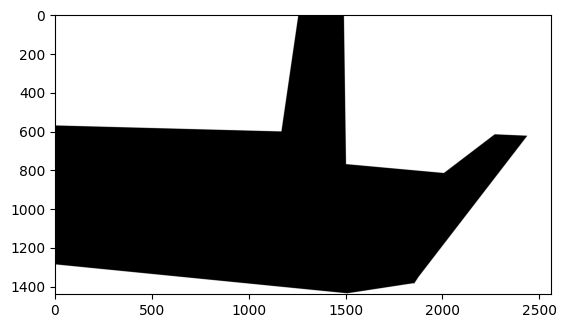

In [11]:
image_path = Path("../DATASETS/hof3/map-undistorted-H.png")

imgmap = ImageMap(image_path, None, "hof3-undistorted-H")

plt.imshow(cv2.imread(image_path))


In [12]:

path = Path("EXPERIMENTS/raw/hof3/")
calibration_path = Path("../DATASETS/hof3/calibration.json")
homography_path = Path("../DATASETS/hof3/homography.json")

camera = Camera.from_paths(calibration_path, homography_path, 12)

imgmap = ImageMap(image_path, None, "hof3-undistorted")


In [2]:

img = imgmap.as_image()

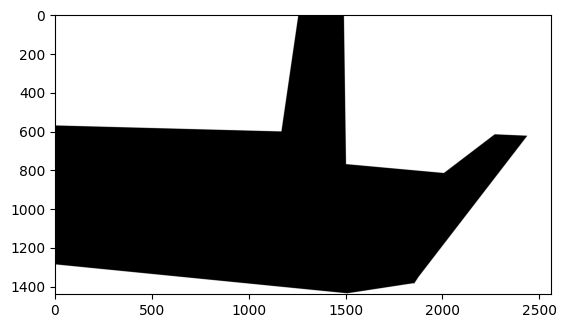

In [7]:

img = np.flipud(img)
plt.imshow(img)

In [ ]:
from trap.tracker import TrackReader


reader = TrackReader(path, camera.fps, exclude_whitelisted = False, include_blacklisted=False)

In [16]:

from typing import List
from trap.frame_emitter import Track
from trap.tracker import FinalDisplacementFilter


tracks: List[Track] = [t for t in reader]
filter = FinalDisplacementFilter(2)
tracks = filter.apply(tracks, camera)

In [37]:
# track = tracks[0]
for track in tracks:
    history = track.get_projected_history(None, camera)
    points = imgmap.to_map_points(history)
    print(history, points)
    if not ((points[:,0] > 0 ) & (points[:,0] < 2440) & (points[:,1] > 0) & (points[:,1] < 1440)).all():
        print("not all points between limits")
        print(points)
    break

# track.to_trajectron_node(camera, env)

[[     12.247      6.8275]
 [     12.416      6.5942]
 [     12.528      6.5035]
 [     12.594      6.4782]
 [     12.631       6.477]
 [      12.66       6.424]
 [     12.706       6.369]
 [     12.785      6.2094]
 [     12.849      6.0079]
 [     12.919      5.7624]
 [     12.954      5.6717]
 [     12.979      5.6476]
 [     12.985       5.613]
 [     13.027      5.4535]
 [     13.072      5.2315]
 [     13.129       4.995]
 [     13.159       4.894]
 [     13.167      4.8371]
 [     13.163      4.8151]
 [     13.174      4.7545]
 [       13.2      4.5546]
 [     13.237      4.2617]
 [     13.241       4.165]
 [     13.242      4.1164]
 [     13.233      4.1089]
 [     13.238      4.0344]
 [      13.24       3.967]
 [     13.318      3.5567]
 [     13.329      3.4015]
 [     13.344      3.3385]
 [     13.357      3.3064]
 [     13.331      3.3068]
 [     13.298      3.0786]
 [      13.35      2.8114]
 [     13.364      2.6867]
 [     13.346      2.6791]
 [     13.326      2.6335]] 